## Source

## Hierarchical Clustering

In [103]:
import os
import spacy
from spacy import displacy
from collections import Counter
nlp = spacy.load("en_core_web_sm")
import pandas as pd
#from py_thesaurus import Thesaurus

import nltk
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer

import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [104]:
prosp2table = pd.read_excel("./outputs/prosp2table.xlsx", columns=["subfund", "isin_list", "objective"])
prosp2table.head()

Unnamed: 0                                subfund  \
0           0  Absolute Return Global Opportunities    
1           1          Absolute Return Low Vol Bond    
2           2        Absolute Return Multi-Strategy    
3           3                                  Aqua    
4           4                    Asia ex-Japan Bond    

                                           isin_list  \
0  ['LU1920356513', 'LU1920356604', 'LU1920356786...   
1  ['LU0823447643', 'LU0823447999', 'LU1270630285...   
2  ['LU1270631846', 'LU1270631929', 'LU1270632067...   
3  ['LU1165135440', 'LU1165135523', 'LU1664645014...   
4  ['LU0823379622', 'LU0823379895', 'LU0823379549...   

                                  objective_policies  
0  Investment objective Increase the value of its...  
1  Investment objective Generate positive returns...  
2  Investment objective Increase the value of its...  
3  Investment objective Increase the value of its...  
4  Investment objective Increase the value of its...

In [105]:
prosp2terms = pd.read_excel("./outputs/prosp2terms.xlsx")
prosp2terms.head()

Unnamed: 0  #    type                                  key pattern  \
0           0  1       T                          n: sub-fund       N   
1           1  2       T  ann: efficient portfolio management   A N N   
2           2  2  V[ih]+  ann: effective portfolio management   A N N   
3           3  3       T                             n: ucits       N   
4           4  4       T                              n: ucis       N   

                            pilot  spec  freq  dFreq   ind semScore  isDico  \
0                        sub-fund  5,24   462    108  0,53      NaN     NaN   
1  efficient portfolio management  4,99   129     91  0,83      NaN     NaN   
2  effective portfolio management  3,35     3      3  1,00     0,50     1.0   
3                           UCITS  4,94   117    105  0,98      NaN     NaN   
4                            UCIs  4,93   114    102  0,98      NaN     NaN   

   isDistrib  Unnamed: 13 Unnamed: 14  \
0        NaN          NaN         NaN   
1        NaN          NaN         NaN   
2        0.0          NaN         NaN   
3        NaN          NaN         NaN   
4        NaN          NaN         NaN   

                                        subfund_list  
0  ['Absolute Return Global Opportunities ', 'Abs...  
1  ['Absolute Return Low Vol Bond ', 'Absolute Re...  
2  ['Sustainable Multi-Asset Balanced ', 'Sustain...  
3  ['Absolute Return Global Opportunities ', 'Abs...  
4  ['Absolute Return Global Opportunities ', 'Abs...

In [114]:
subfund = [sub for sub in prosp2table.loc[:,"subfund"]]
print(len(subfund))

108


In [107]:
texts = [text for text in prosp2table.loc[:,"objective_policies"]]

In [6]:
print(texts[0])

Investment objective Increase the value of its assets over the medium term. This absolute return diversified sub-fund targets volatility of approximately 500 basis points with a maximum of 800 basis points measured using the annualized standard deviation of returns. This should be understood to be neither a guarantee that this will be achieved nor a forward-looking statement limiting expected risk. 
Investment policy The objective of the sub-fund is to be invested indirectly through UCITS and/or UCIs up to 100% of its assets in fixed-rate or floating-rate debt securities (bonds, negotiable debt securities, certificates of deposit, commercial paper, etc. insofar as such securities can be described as transferable securities), and in equities issued by companies from any country. The portfolio allocation will be composed of  1) a low risky asset part (through, such as but not limited to, high quality Money Market funds), and 2) a risky asset part  Index-tracker funds that give exposure t

## TFIDF with terms

### Construct a document-term matrix:
list of document/subfund as rows and list of terms as column. for each term, calculate tfidf.

In [108]:
# list of terms per subfund

prosp2term = []
for subfund in prosp2table.loc[:,"subfund"]:
    term_selected = list(prosp2terms.pilot[prosp2terms.subfund_list.str.contains(subfund)])
    prosp2term.append(term_selected)
print(prosp2term[0])


/Users/airbooklea/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


['sub-fund', 'UCITS', 'UCIs', 'Investment objective', 'investments of the sub-fund', 'debt securities', 'floating-rate debt securities', 'transferable securities', 'directional', 'Investment policy', 'performance objective', 'absolute performance objective', 'allocation strategy', 'developed', 'asset allocation', 'directional positions', 'income securities', 'fixed-rate', 'basis points', 'commodities or real estate', 'standard deviation of returns', 'forward-looking statement', 'compliant', 'risky asset part', 'floating-rate', 'Derivatives', 'part of the portfolio', 'objective of the sub-fund', 'volatility of equities', 'risk fundamentals of the assets', 'diversified sub-fund targets volatility', 'volatility constraint', 'valuations and risk fundamentals', 'dynamically', 'absolute return diversified sub-fund targets', 'macro-economic', 'Governance', 'Investment Manager', 'annualized standard deviation', 'medium term', 'real estate', 'disciplined screening', 'macro-economic fundamentals

In [109]:
# string of terms

term_4_tfidf = [' '.join(word for word in text) for text in prosp2term]

## Clustering

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


vec = TfidfVectorizer(stop_words='english', lowercase=True, min_df=0.2, ngram_range=(1,3), use_idf=True)
vec.fit(texts)
features = vec.transform(texts)
data_scaled = pd.DataFrame(vec.transform(texts).toarray(), columns=sorted(vec.vocabulary_.keys()))
data_scaled

10  10 assets  10 assets invested  10 assets ucits        15  \
0    0.068880   0.000000            0.000000         0.000000  0.000000   
1    0.027119   0.000000            0.000000         0.000000  0.000000   
2    0.011920   0.000000            0.000000         0.000000  0.000000   
3    0.050585   0.055479            0.000000         0.093818  0.081640   
4    0.036578   0.040117            0.063893         0.000000  0.000000   
..        ...        ...                 ...              ...       ...   
103  0.093833   0.051456            0.000000         0.087015  0.000000   
104  0.166401   0.073001            0.000000         0.061724  0.000000   
105  0.033601   0.036852            0.058693         0.000000  0.054230   
106  0.041009   0.044978            0.071634         0.000000  0.066186   
107  0.000000   0.000000            0.000000         0.000000  0.000000   

     15 assets  15 assets 10        20        25  25 assets  ...  \
0     0.000000      0.000000  0.000000  0.000000   0.000000  ...   
1     0.000000      0.000000  0.000000  0.000000   0.000000  ...   
2     0.000000      0.000000  0.028094  0.000000   0.000000  ...   
3     0.082544      0.000000  0.000000  0.080753   0.085362  ...   
4     0.000000      0.000000  0.000000  0.058393   0.061726  ...   
..         ...           ...       ...       ...        ...  ...   
103   0.000000      0.000000  0.110575  0.000000   0.000000  ...   
104   0.000000      0.000000  0.000000  0.000000   0.000000  ...   
105   0.054830      0.065553  0.000000  0.053641   0.056702  ...   
106   0.066919      0.080007  0.000000  0.065467   0.069204  ...   
107   0.000000      0.000000  0.000000  0.000000   0.000000  ...   

     used investment  used investment purposes     value  value assets  \
0           0.000000                  0.000000  0.033813      0.041489   
1           0.064999                  0.032499  0.013313      0.000000   
2           0.000000                  0.000000  0.011703      0.014360   
3           0.000000                  0.000000  0.099327      0.060938   
4           0.000000                  0.000000  0.035912      0.044064   
..               ...                       ...       ...           ...   
103         0.000000                  0.000000  0.092124      0.000000   
104         0.000000                  0.000000  0.032674      0.040092   
105         0.000000                  0.000000  0.032989      0.040478   
106         0.000000                  0.000000  0.080525      0.000000   
107         0.000000                  0.000000  0.047741      0.000000   

     value assets medium  volatility       way  way liquidity  \
0               0.042692    0.235755  0.000000       0.000000   
1               0.000000    0.278464  0.031439       0.031958   
2               0.014776    0.271994  0.027638       0.028094   
3               0.062706    0.000000  0.000000       0.000000   
4               0.045343    0.083463  0.084809       0.086209   
..                   ...         ...       ...            ...   
103             0.000000    0.000000  0.000000       0.000000   
104             0.041255    0.000000  0.000000       0.000000   
105             0.041652    0.000000  0.000000       0.000000   
106             0.000000    0.093575  0.000000       0.000000   
107             0.000000    0.000000  0.000000       0.000000   

     way liquidity sub     yield  
0             0.000000  0.000000  
1             0.031958  0.032499  
2             0.028094  0.028570  
3             0.000000  0.000000  
4             0.086209  0.000000  
..                 ...       ...  
103           0.000000  0.224896  
104           0.000000  0.079765  
105           0.000000  0.000000  
106           0.000000  0.000000  
107           0.000000  0.000000  

[108 rows x 403 columns]

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vec = TfidfVectorizer(stop_words='english', lowercase=True, min_df=0.2, ngram_range=(1,3), use_idf=True)
vec.fit(term_4_tfidf)
features = vec.transform(term_4_tfidf)
data_scaled = pd.DataFrame(vec.transform(term_4_tfidf).toarray(), columns=sorted(vec.vocabulary_.keys()))
data_scaled

account  activities  activities portion  \
0    0.000000    0.000000            0.000000   
1    0.000000    0.000000            0.000000   
2    0.000000    0.000000            0.000000   
3    0.000000    0.122884            0.000000   
4    0.000000    0.000000            0.000000   
..        ...         ...                 ...   
103  0.090948    0.000000            0.000000   
104  0.000000    0.000000            0.000000   
105  0.000000    0.096146            0.105736   
106  0.000000    0.101734            0.111881   
107  0.091886    0.000000            0.000000   

     activities portion environmental  additional  additional details  \
0                            0.000000    0.000000            0.000000   
1                            0.000000    0.000000            0.000000   
2                            0.000000    0.048098            0.048098   
3                            0.000000    0.000000            0.000000   
4                            0.000000    0.000000            0.000000   
..                                ...         ...                 ...   
103                          0.000000    0.000000            0.000000   
104                          0.000000    0.000000            0.000000   
105                          0.105736    0.000000            0.000000   
106                          0.111881    0.000000            0.000000   
107                          0.000000    0.000000            0.000000   

          aim  appendix  appendix derivatives  approach  ...      ucis  \
0    0.000000  0.000000              0.000000   0.00000  ...  0.049446   
1    0.043134  0.019078              0.000000   0.12546  ...  0.018730   
2    0.048856  0.021609              0.000000   0.00000  ...  0.021215   
3    0.000000  0.000000              0.000000   0.00000  ...  0.055869   
4    0.100944  0.044647              0.080073   0.00000  ...  0.043834   
..        ...       ...                   ...       ...  ...       ...   
103  0.000000  0.043979              0.078874   0.00000  ...  0.043178   
104  0.000000  0.050439              0.090460   0.00000  ...  0.049521   
105  0.000000  0.044524              0.000000   0.00000  ...  0.043712   
106  0.000000  0.047111              0.084491   0.20654  ...  0.046253   
107  0.000000  0.044433              0.000000   0.00000  ...  0.000000   

     ucis investment  ucis investment objective     ucits  ucits ucis  \
0           0.049446                   0.049446  0.048994    0.049903   
1           0.018730                   0.018730  0.018559    0.018903   
2           0.021215                   0.021215  0.021021    0.021411   
3           0.055869                   0.055869  0.055358    0.056384   
4           0.043834                   0.043834  0.043433    0.044239   
..               ...                        ...       ...         ...   
103         0.043178                   0.043178  0.042783    0.043577   
104         0.049521                   0.049521  0.049068    0.049978   
105         0.043712                   0.043712  0.043313    0.044116   
106         0.046253                   0.046253  0.045830    0.046680   
107         0.000000                   0.000000  0.000000    0.000000   

     ucits ucis investment  universe  universe sub  universe sub fund  \
0                 0.049903  0.000000      0.000000           0.000000   
1                 0.018903  0.135231      0.044553           0.044553   
2                 0.021411  0.114878      0.000000           0.000000   
3                 0.056384  0.000000      0.000000           0.000000   
4                 0.044239  0.000000      0.000000           0.000000   
..                     ...       ...           ...                ...   
103               0.043577  0.000000      0.000000           0.000000   
104               0.049978  0.000000      0.000000           0.000000   
105               0.044116  0.236698      0.103975           0.103975   
106               0.046680  0.166970      0.

In [112]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(data_scaled)
print(len(dist))

108


In [14]:
num_clusters=5
cls = MiniBatchKMeans(n_clusters=num_clusters)
cls.fit(features)
clusters = cls.labels_.tolist()

In [36]:

films = { 'subfund': subfund, 'objective': texts, 'cluster': clusters}

frame = pd.DataFrame(films, index = [clusters] , columns = ['subfund', 'cluster'])

In [49]:
frame2 = frame.set_index('subfund')

In [38]:

frame['cluster'].value_counts() #number of subfund per cluster (clusters from 0 to 4)

0    43
2    26
1    18
4    13
3     8
Name: cluster, dtype: int64

In [50]:
frame2

cluster
subfund                                       
Absolute Return Global Opportunities         4
Absolute Return Low Vol Bond                 2
Absolute Return Multi-Strategy               2
Aqua                                         0
Asia ex-Japan Bond                           2
...                                        ...
US Multi-Factor High Yield Bond              2
US Short Duration Bond                       2
US Small Cap                                 0
US Value Multi-Factor Equity                 3
USD Money Market                             2

[108 rows x 1 columns]

In [67]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = cls.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % prosp2terms.iloc[ind]["pilot"].values.tolist(), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d subfund:" % i, end='')
    for sub in frame.loc[:,"subfund"].values.tolist():
        print(' %s,' % sub, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words:

AttributeError: 'str' object has no attribute 'values'

In [68]:
# reduce the features to 2D
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

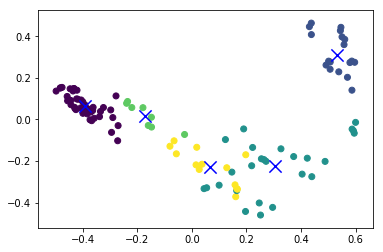

In [69]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [70]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.20330314080623768

In [71]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn.fit(features)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [72]:
with open('./terminology/kiid_obj/output/kiid_obj/kiidoc2obj1867.txt') as text1:
    text1 = text1.read()
with open('./terminology/kiid_obj/output/kiid_obj/kiidoc2obj2457.txt') as text2:
    text2 = text2.read()

In [73]:
input_texts = [text1, text2]
input_features = vec.transform(input_texts)

D, N = knn.kneighbors(input_features, n_neighbors=2, return_distance=True)

for input_text, distances, neighbors in zip(input_texts, D, N):
    print("Input text = ", input_text[:200], "\n")
    for dist, neighbor_idx in zip(distances, neighbors):
        print("Distance = ", dist, "Neighbor idx = ", neighbor_idx)
        print(texts[neighbor_idx][:200])
        print("-"*200)
    print("="*200)
    print()

Input text =  Objectives and Investment Policy The Fund seeks to increase the value of its assets over the medium term by investing in shares undervalued as compared to the market on the purchase date, issued by US 

Distance =  0.5311050843394014 Neighbor idx =  91
Investment objective Increase the value of its assets over the medium term by investing in ESG companies through equities and bonds. 
Investment policy This sub-fund invests directly or indirectly (th
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Distance =  0.5441023766568255 Neighbor idx =  95
Investment objective Increase the value of the sub-fund's assets through investment growth, while keeping volatility at a limited level (i.e. annualised volatility target of 4% on average). 
Investmen
--------------------------------------------------------------------------------

## Hierarchical Clustering

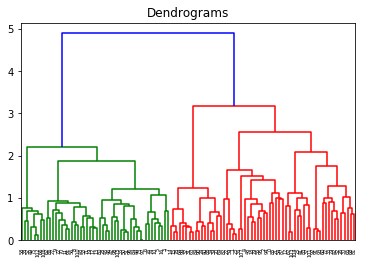

In [35]:
import scipy.cluster.hierarchy as shc
plt.figure()  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

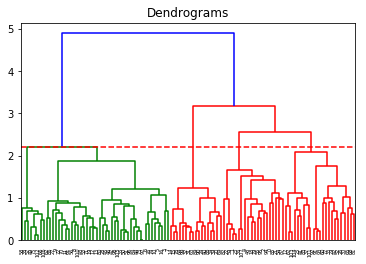

In [36]:
plt.figure()  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=2.2, color='r', linestyle='--')

In [37]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 3, 1, 2, 3,
       3, 3, 2, 0, 0, 1, 1, 0, 0, 2, 2, 0, 2, 1, 3, 0, 4, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 3, 4, 1, 1, 0, 1, 3, 3, 1, 4, 4, 3, 0, 1, 1, 2, 2, 0,
       4, 0, 0, 2, 1, 1, 1, 1, 1, 4, 1, 0, 2, 3, 1, 0, 3, 0, 1, 3, 1, 3,
       2, 2, 2, 0, 0, 0, 3, 3, 1, 1, 1, 2, 1, 0, 4, 0, 0, 1, 4, 3])

/Users/airbooklea/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


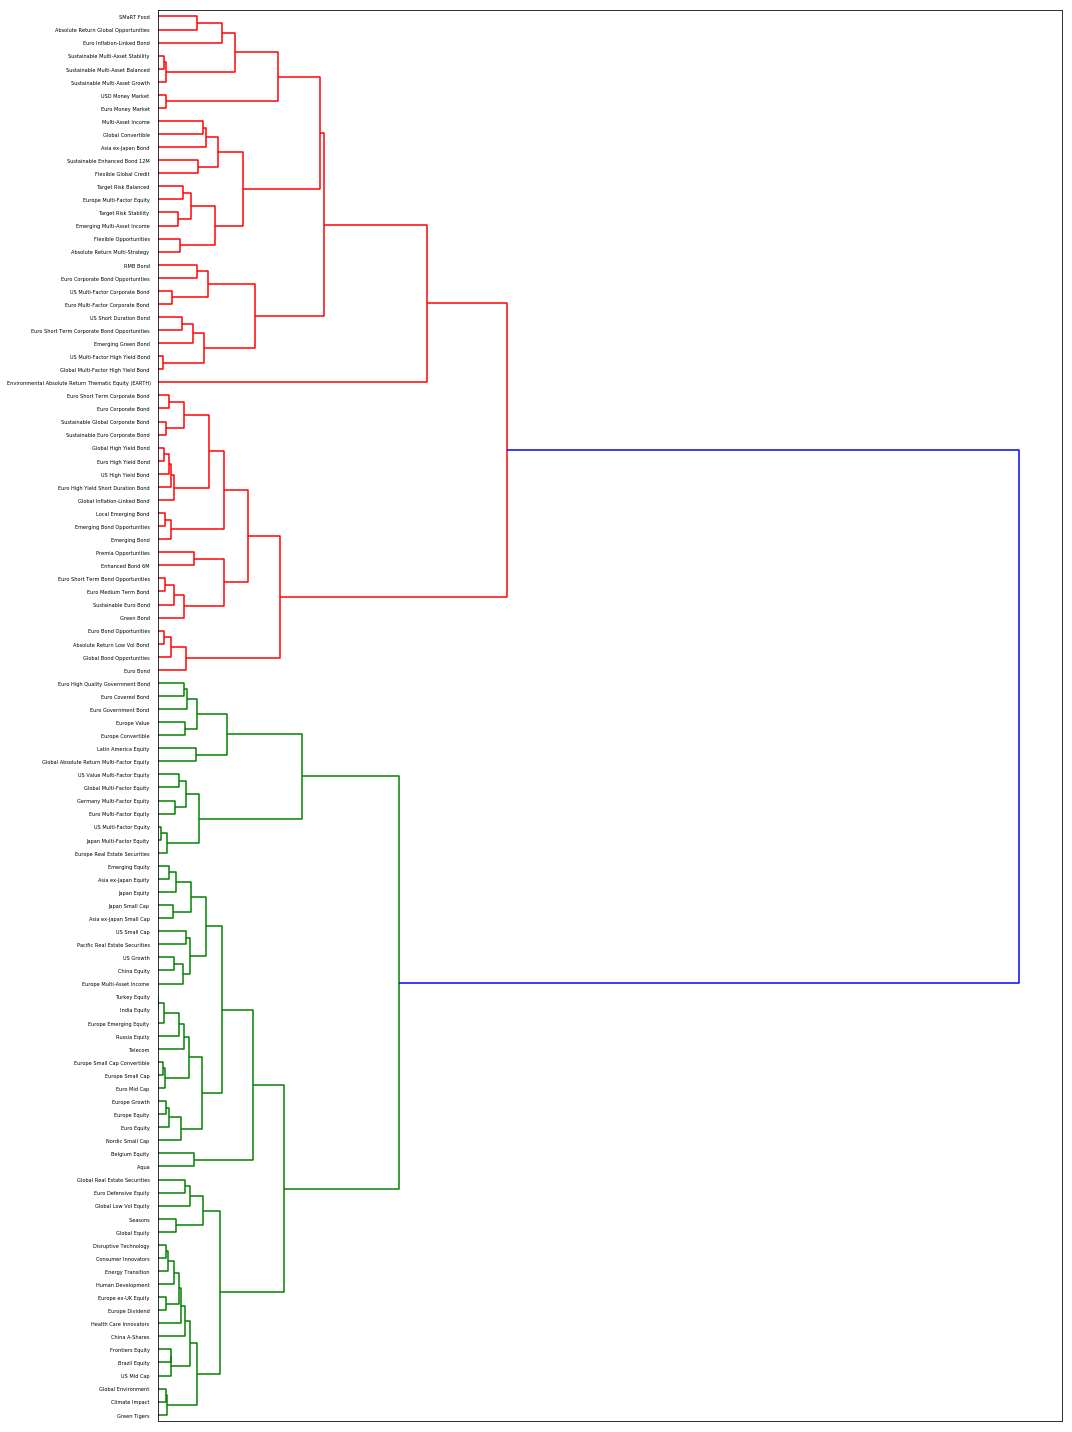

In [115]:

from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=subfund);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [116]:
plt.close()

## Latent Dichrichlet Allocation

### Clean and tokenize text

In [5]:
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import punkt
#from stop_words import get_stop_words
from nltk import pos_tag

#stop_words = get_stop_words('en')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

SPACE_REPLACEMENT = re.compile('[/(){}\[\]\|@,;:&]')
SYMBOLS = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update(["and/or", "also","etc","within","e.g"])
ROMAN_NUM = re.compile('^(ix|iv|v?i{0,3})$')
pattern = r'''(?x)     # set flag to allow verbose regexps
     (?:[A-Z]\.)+       # abbreviations, e.g. U.S.A.
   | \w+(?:-\w+)*       # words with optional internal hyphens
   | \$?\d+(?:\.\d+)?%? # currency and percentages, e.g. $12.40, 82%
   | \.\.\.             # ellipsis
   | [][.,;"'?():-_`]   # these are separate tokens; includes ], [
 '''

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    #text = text.lower() # lowercase text
    #text = ' '.join(nltk.regexp_tokenize(text, pattern))
    text = SPACE_REPLACEMENT.sub(' ', text) # replace SPACE_REPLACEMENT symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = ROMAN_NUM.sub('', text)
    #text = SYMBOLS.sub('', text) # remove symbols present in SYMBOLS from text. 
    
    #text = [' '.join(word for word in word_tokenize(text.lower()) if word not in STOPWORDS)] # tokenize text
    text = word_tokenize(text.lower())
    
    text = [word for word in text if word not in STOPWORDS] # remove stopwords from text
    #text = list(lemmatizer.lemmatize(text))
   
    #text = [[word for word in text if word not in stopwords] for text in tokenized_text]
    #text = re.sub(r"(\*)|(\s[a-z]\))|(\s\-)|(\-\s)|(\r)", " ", text)
    return text

In [6]:

tokenized_text = prosp2table["objective_policies"].apply(clean_text)

In [7]:
print(tokenized_text[0])

['investment', 'objective', 'increase', 'value', 'assets', 'medium', 'term', '.', 'absolute', 'return', 'diversified', 'sub-fund', 'targets', 'volatility', 'approximately', '500', 'basis', 'points', 'maximum', '800', 'basis', 'points', 'measured', 'using', 'annualized', 'standard', 'deviation', 'returns', '.', 'understood', 'neither', 'guarantee', 'achieved', 'forward-looking', 'statement', 'limiting', 'expected', 'risk', '.', 'investment', 'policy', 'objective', 'sub-fund', 'invested', 'indirectly', 'ucits', 'ucis', '100', '%', 'assets', 'fixed-rate', 'floating-rate', 'debt', 'securities', 'bonds', 'negotiable', 'debt', 'securities', 'certificates', 'deposit', 'commercial', 'paper', '.', 'insofar', 'securities', 'described', 'transferable', 'securities', 'equities', 'issued', 'companies', 'country', '.', 'portfolio', 'allocation', 'composed', '1', 'low', 'risky', 'asset', 'part', 'limited', 'high', 'quality', 'money', 'market', 'funds', '2', 'risky', 'asset', 'part', 'index-tracker', 

In [117]:
texts = [[word for word in text] for text in prosp2term]

In [118]:
# Lemmatize the documents.
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
texts = [[lemmatizer.lemmatize(token) for token in text] for text in texts]

In [119]:
from gensim import corpora, models, similarities
#from gensim.corpora.dictionary import load_from_text, doc2bow
#from gensim.corpora import MmCorpus
from gensim.models.ldamodel import LdaModel

In [120]:
import gensim

In [135]:

#create a Gensim dictionary from the texts
id2word = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
id2word.filter_extremes(no_below=10)

#convert the dictionary to a bag of words corpus for reference
corpus = [id2word.doc2bow(text) for text in texts]

num_topics=8

In [136]:

%time lda_model = models.LdaModel(corpus=corpus, num_topics=8, id2word=id2word, update_every=5, chunksize=100, passes=10)

CPU times: user 495 ms, sys: 8.94 ms, total: 504 ms
Wall time: 517 ms


In [138]:
lda_model.show_topics()

[(0,
  '0.105*"time" + 0.104*"debt securities of any kind" + 0.100*"equity equivalent securities" + 0.053*"registered offices" + 0.042*"business activities" + 0.042*"majority" + 0.041*"investments limits" + 0.041*"respect of the above investments" + 0.041*"respect" + 0.035*"P-Notes"'),
 (1,
  '0.040*"factor" + 0.038*"strategy" + 0.038*"fact" + 0.038*"risk" + 0.038*"increase" + 0.037*"quality" + 0.037*"momentum" + 0.036*"order" + 0.032*"equity equivalent securities" + 0.032*"factor styles"'),
 (2,
  '0.085*"debt securities of any kind" + 0.068*"time" + 0.068*"equity equivalent securities" + 0.063*"country" + 0.061*"Europe" + 0.059*"fight" + 0.055*"warrant" + 0.054*"registered offices" + 0.049*"capital" + 0.041*"majority"'),
 (3,
  '0.047*"euro" + 0.046*"bond" + 0.041*"Europe" + 0.038*"promptly" + 0.037*"event" + 0.036*"composition of the portfolio" + 0.033*"interest of the shareholders" + 0.031*"restructuring" + 0.027*"case" + 0.027*"corporate bonds"'),
 (4,
  '0.030*"month" + 0.028*"eu

In [139]:
top_topics = lda_model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -1.1627.
[([(0.02580788, 'short term capital'),
   (0.025789777, 'liquidity of the sub-fund'),
   (0.025782395, 'safe'),
   (0.025728857, 'Repurchase transactions'),
   (0.02567016, 'portfolio management with the aim'),
   (0.025562055, 'liquid'),
   (0.025493624, 'liquidity'),
   (0.025101373, 'purchase'),
   (0.02501742, 'short'),
   (0.025013646, 'condition'),
   (0.024547877, 'long'),
   (0.02398547, 'order'),
   (0.023720149, 'capital'),
   (0.02319693, 'cost'),
   (0.023148326, 'Additional details'),
   (0.022722539, 'investment universe'),
   (0.021816531, 'index'),
   (0.020955155, 'purpose'),
   (0.020291483, 'bond'),
   (0.019810656, 'better coverage of markets')],
  -0.19413364849001408),
 ([(0.029654717, 'month'),
   (0.028273432, 'euro'),
   (0.026220635, 'investment universe'),
   (0.025032751, 'index'),
   (0.023976142, 'Investment Grade'),
   (0.022630615, 'universe of the aforesaid index'),
   (0.021962613, 'bond'),
   (0.021903217, 'Bloomberg 

In [140]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.6917450912219911


In [141]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [142]:
print(len(corpus))

108


In [147]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)


# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')


# Validation sets
num_of_docs = int(len(corpus))
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
                gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.5)), 
               #gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['50% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }



In [148]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
    
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)

                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results2.csv', index=False)
    pbar.close()


















  0%|          | 0/540 [00:00<?, ?it/s]
















  0%|          | 1/540 [00:01<12:32,  1.40s/it]
















  0%|          | 2/540 [00:02<12:42,  1.42s/it]
















  1%|          | 3/540 [00:04<12:19,  1.38s/it]
















  1%|          | 4/540 [00:05<12:26,  1.39s/it]
















  1%|          | 5/540 [00:06<11:41,  1.31s/it]
















  1%|          | 6/540 [00:07<11:16,  1.27s/it]
















  1%|▏         | 7/540 [00:09<10:57,  1.23s/it]
















  1%|▏         | 8/540 [00:10<10:39,  1.20s/it]
















  2%|▏         | 9/540 [00:11<11:01,  1.25s/it]
















  2%|▏         | 10/540 [00:13<11:46,  1.33s/it]
















  2%|▏         | 11/540 [00:14<11:33,  1.31s/it]
















  2%|▏         | 12/540 [00:15<11:27,  1.30s/it]
















  2%|▏         | 13/540 [00:16<11:16,  1.28s/it]
















  3%|▎         | 14/540 [00:18<11:20,  1.29s/it]
















  3%|▎         | 15/540 [0

 26%|██▌       | 140/540 [03:01<08:02,  1.21s/it]
















 26%|██▌       | 141/540 [03:03<08:44,  1.31s/it]
















 26%|██▋       | 142/540 [03:05<09:24,  1.42s/it]
















 26%|██▋       | 143/540 [03:06<09:38,  1.46s/it]
















 27%|██▋       | 144/540 [03:07<08:58,  1.36s/it]
















 27%|██▋       | 145/540 [03:08<08:30,  1.29s/it]
















 27%|██▋       | 146/540 [03:09<08:08,  1.24s/it]
















 27%|██▋       | 147/540 [03:11<07:58,  1.22s/it]
















 27%|██▋       | 148/540 [03:12<07:43,  1.18s/it]
















 28%|██▊       | 149/540 [03:13<07:32,  1.16s/it]
















 28%|██▊       | 150/540 [03:14<07:28,  1.15s/it]
















 28%|██▊       | 151/540 [03:15<07:32,  1.16s/it]
















 28%|██▊       | 152/540 [03:16<07:26,  1.15s/it]
















 28%|██▊       | 153/540 [03:17<07:23,  1.14s/it]
















 29%|██▊       | 154/540 [03:19<07:23,  1.15s/it]
















 29%|██▊  

 52%|█████▏    | 280/540 [06:13<05:24,  1.25s/it]
















 52%|█████▏    | 281/540 [06:15<05:13,  1.21s/it]
















 52%|█████▏    | 282/540 [06:16<05:04,  1.18s/it]
















 52%|█████▏    | 283/540 [06:17<05:03,  1.18s/it]
















 53%|█████▎    | 284/540 [06:18<05:03,  1.18s/it]
















 53%|█████▎    | 285/540 [06:19<04:58,  1.17s/it]
















 53%|█████▎    | 286/540 [06:20<04:52,  1.15s/it]
















 53%|█████▎    | 287/540 [06:21<04:45,  1.13s/it]
















 53%|█████▎    | 288/540 [06:22<04:39,  1.11s/it]
















 54%|█████▎    | 289/540 [06:24<04:34,  1.09s/it]
















 54%|█████▎    | 290/540 [06:25<04:33,  1.09s/it]
















 54%|█████▍    | 291/540 [06:26<04:35,  1.11s/it]
















 54%|█████▍    | 292/540 [06:27<04:35,  1.11s/it]
















 54%|█████▍    | 293/540 [06:28<04:35,  1.12s/it]
















 54%|█████▍    | 294/540 [06:29<04:35,  1.12s/it]
















 55%|█████

 78%|███████▊  | 420/540 [08:48<02:03,  1.03s/it]
















 78%|███████▊  | 421/540 [08:49<02:02,  1.03s/it]
















 78%|███████▊  | 422/540 [08:50<02:04,  1.06s/it]
















 78%|███████▊  | 423/540 [08:51<02:02,  1.05s/it]
















 79%|███████▊  | 424/540 [08:52<02:00,  1.04s/it]
















 79%|███████▊  | 425/540 [08:53<01:58,  1.03s/it]
















 79%|███████▉  | 426/540 [08:54<02:01,  1.07s/it]
















 79%|███████▉  | 427/540 [08:55<02:02,  1.09s/it]
















 79%|███████▉  | 428/540 [08:56<02:02,  1.09s/it]
















 79%|███████▉  | 429/540 [08:58<02:05,  1.13s/it]
















 80%|███████▉  | 430/540 [08:59<02:05,  1.14s/it]
















 80%|███████▉  | 431/540 [09:00<02:03,  1.13s/it]
















 80%|████████  | 432/540 [09:01<02:01,  1.12s/it]
















 80%|████████  | 433/540 [09:02<01:59,  1.12s/it]
















 80%|████████  | 434/540 [09:03<02:00,  1.14s/it]
















 81%|█████

In [149]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.01,
                                           eta=0.9)

In [152]:
! pip3 install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
You should consider upgrading via the '/Users/airbooklea/anaconda3/bin/python -m pip install --upgrade pip' command.


In [153]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.069678  0.024299       1        1  30.288284
16    -0.195160 -0.028292       2        1  20.855503
4      0.119091  0.000038       3        1  16.844015
15     0.078629 -0.087118       4        1  12.264295
8     -0.000545  0.071068       5        1   6.935196
14    -0.009867  0.032223       6        1   2.725993
10     0.007362  0.010186       7        1   2.285951
18    -0.016061  0.023307       8        1   1.707821
9     -0.036854 -0.007637       9        1   1.680390
6      0.005913 -0.007778      10        1   1.532036
12     0.007437 -0.005609      11        1   0.939258
5     -0.010484 -0.003092      12        1   0.873205
13    -0.002044  0.002236      13        1   0.797938
2     -0.003111 -0.003848      14        1   0.038588
3     -0.003017 -0.004001      15        1   0.038588
19    -0.002466 -0.003843      16        1   0.038588
7     -0.003397 -0.004002      17        1   0.038588
11    -0.002127 -0.004489      18        1   0.038588
17    -0.002104 -0.004476      19        1   0.038588
0     -0.000874  0.000831      20        1   0.038588, topic_info=                             Term       Freq      Total Category  logprob  \
99    debt securities of any kind  44.000000  44.000000  Default  30.0000   
104                          time  40.000000  40.000000  Default  29.0000   
100  equity equivalent securities  44.000000  44.000000  Default  28.0000   
107            registered offices  30.000000  30.000000  Default  27.0000   
0                            bond  39.000000  39.000000  Default  26.0000   
..                            ...        ...        ...      ...      ...   
100  equity equivalent securities   0.007540  44.702805  Topic20  -4.9403   
99    debt securities of any kind   0.007521  44.701702  Topic20  -4.9429   
75                         sector   0.007194  20.061853  Topic20  -4.9874   
84                        warrant   0.007140  19.435152  Topic20  -4.9949   
30                        capital   0.007153  34.898861  Topic20  -4.9930   

     loglift  
99   30.0000  
104  29.0000  
100  28.0000  
107  27.0000  
0    26.0000  
..       ...  
100  -0.8275  
99   -0.8301  
75   -0.0734  
84   -0.0491  
30   -0.6327  

[989 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
87        1  0.347027  Additional details
87        2  0.038559  Additional details
87        3  0.308468  Additional details
87        4  0.231351  Additional details
87        5  0.038559  Additional details
...     ...       ...                 ...
86        2  0.089012           worldwide
86        3  0.089012           worldwide
86        4  0.089012           worldwide
86        5  0.089012           worldwide
86        9  0.178024           worldwide

[801 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 17, 5, 16, 9, 15, 11, 19, 10, 7, 13, 6, 14, 3, 4, 20, 8, 12, 18, 1])

In [154]:
dir_out = "./data/output/prosp_obj"
file_list = [f for f in os.listdir(dir_out)]
doc_lda_list = []
for f in file_list:
    with open(os.path.join(dir_out, f)) as data:
        document = data.read()
        doc_bow = id2word.doc2bow(document.split())
        doc_lda = lda_model[doc_bow]
        doc_lda_list.append(doc_lda)

In [155]:
doc_lda_list[10]

[(15, 0.99214864)]

In [18]:
dict_lda_list = []
topic_1 = []
topic_2 = []
topic_3 = []
topic_4 = []
topic_0 = []
for doc_lda in doc_lda_list:
    for t in doc_lda:
        #topic_2 = t.count(2)
        dict_1=dict() 
  
        for topic,score in doc_lda: 
            
            dict_1.setdefault(topic, []).append(score)
    dict_lda_list.append(dict_1)
    
#print(len(dict_lda_list))
for dict_lda in dict_lda_list:
    if max(dict_lda, key=dict_lda.get) == 2:
        topic_2.append(max(dict_lda, key=dict_lda.get))
    elif max(dict_lda, key=dict_lda.get) == 0:
        topic_0.append(max(dict_lda, key=dict_lda.get))
    elif max(dict_lda, key=dict_lda.get) == 1:
        topic_1.append(max(dict_lda, key=dict_lda.get))
    elif max(dict_lda, key=dict_lda.get) == 3:
        topic_3.append(max(dict_lda, key=dict_lda.get))
    elif max(dict_lda, key=dict_lda.get) == 4:
        topic_4.append(max(dict_lda, key=dict_lda.get))
        
        #print(dict_1) 
print(len(topic_2), len(topic_0), len(topic_1), len(topic_3), len(topic_4))

6 38 21 11 32


## LSA with SVD

## TFIDF with terms

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
#documents = ["doc1.txt", "doc2.txt", "doc3.txt"] 
  
# raw documents to tf-idf matrix: 
vectorizer = TfidfVectorizer(stop_words='english', 
                             use_idf=True, 
                             smooth_idf=True)
# SVD to reduce dimensionality: 
svd_model = TruncatedSVD(n_components=100,         #num dimensions
                         algorithm='randomized',
                         n_iter=10)
# pipeline of tf-idf + SVD, fit to and applied to documents:
svd_transformer = Pipeline([('tfidf', vectorizer), 
                            ('svd', svd_model)])
svd_matrix = svd_transformer.fit_transform(term_4_tfidf)

# svd_matrix can later be used to compare documents, compare words, or compare queries with documents

In [14]:
print(svd_matrix[0])

[ 2.91775065e-01  1.33454855e-01  3.53601786e-02  3.74741994e-01
 -1.13490799e-02  1.42153663e-01 -4.32120192e-03 -1.10019199e-01
 -7.27115279e-02  4.68174880e-02  1.68630546e-02 -1.55316208e-01
  1.12912980e-01 -1.32708682e-01 -1.91979613e-01 -1.31331895e-01
  3.52153286e-02  2.03707787e-01  1.25581729e-01 -5.84853833e-02
 -5.47418566e-02 -8.26545002e-02  6.48986909e-02 -9.46130217e-02
 -4.90653811e-02  3.54676764e-01 -6.38915563e-02 -1.01155015e-01
 -1.01881984e-01  1.75077010e-01  3.82467137e-01  3.56439940e-01
  4.76568602e-02 -1.01053071e-01 -2.55410350e-02  5.10552189e-02
  2.91529807e-03  9.87727464e-03 -7.55709954e-02 -5.93807603e-02
  6.13956983e-02  2.67162096e-03 -6.04556522e-03 -5.57847505e-02
  4.21307382e-02  2.83343935e-03 -6.55367616e-02 -2.81224388e-02
  4.38802655e-02  2.91099721e-02 -2.53539787e-03 -2.40963088e-02
  3.96658079e-02  1.70725670e-02  7.76106821e-03 -2.26710670e-02
  2.68569781e-02 -6.73672339e-02 -8.30301518e-02  4.46517411e-02
 -3.76275172e-02 -2.41342